# Table of Contents
1. Introduction to Naive Bayes algorithm
2. Naive Bayes algorithm intuition
3. Types of Naive Bayes algorithm
4. Applications of Naive Bayes algorithm
5. Import libraries
6. Import dataset
7. Exploratory data analysis
8. Declare feature vector and target variable
9. Split data into separate training and test set
10. Feature engineering
11. Feature scaling
12. Model training
13. Predict the results
14. Check accuracy score
15. Confusion matrix
16. Classification metrices
17. Calculate class probabilities

# 1. Introduction to Naive Bayes algorithm

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

# 2. Naive Bayes algorithm intuition

Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.

# 3. Types of Naive Bayes algorithm

Table of Contents

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

1. Gaussian Naïve Bayes
2. Multinomial Naïve Bayes
3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.

## Gaussian Naïve Bayes algorithm
When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –

![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## Multinomial Naïve Bayes algorithm
With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

## Bernoulli Naïve Bayes algorithm
In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

# 4. Applications of Naive Bayes algorithm

Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.

# 5. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 6. Import dataset

In [2]:
df = pd.read_csv('data/adult.csv', header=None)

# 7. Exploratory Data Analysis (EDA)

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Rename Column names

In [5]:
ColName_list = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation', 'relationship',
                'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = ColName_list
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Types of variables

#### (1) Explore categorical variables

In [8]:
CategoricalColName_list = [eachCol for eachCol in df.columns if df[eachCol].dtype == 'O']

print('There are {} categorical variables\n'.format(len(CategoricalColName_list)))
print('The categorical variables are:\n', CategoricalColName_list)

There are 9 categorical variables

The categorical variables are:
 ['workclass', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [9]:
df[CategoricalColName_list].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
# Frequency of values in each categorical column

for eachCol in CategoricalColName_list:
    print(df[eachCol].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [11]:
# Frequency Distribution of each categorical column

for eachCol in CategoricalColName_list:
    print((df[eachCol].value_counts() / np.float(len(df)) * 100).round(2))

 Private             69.70
 Self-emp-not-inc     7.80
 Local-gov            6.43
 ?                    5.64
 State-gov            3.99
 Self-emp-inc         3.43
 Federal-gov          2.95
 Without-pay          0.04
 Never-worked         0.02
Name: workclass, dtype: float64
 HS-grad         32.25
 Some-college    22.39
 Bachelors       16.45
 Masters          5.29
 Assoc-voc        4.24
 11th             3.61
 Assoc-acdm       3.28
 10th             2.87
 7th-8th          1.98
 Prof-school      1.77
 9th              1.58
 12th             1.33
 Doctorate        1.27
 5th-6th          1.02
 1st-4th          0.52
 Preschool        0.16
Name: education, dtype: float64
 Married-civ-spouse       45.99
 Never-married            32.81
 Divorced                 13.65
 Separated                 3.15
 Widowed                   3.05
 Married-spouse-absent     1.28
 Married-AF-spouse         0.07
Name: martial_status, dtype: float64
 Prof-specialty       12.71
 Craft-repair         12.59
 Exec-ma

Now, we can see that there are missing values in **workclass, occupation, and native_country**.

Explore workclass column

In [12]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Explore occupation column

In [14]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Explore native_country variable

In [16]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [17]:
df['native_country'] = df['native_country'].replace(' ?', np.nan)
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

Check missing values in categorical columns

In [18]:
df[CategoricalColName_list].isnull().sum(axis=0)

workclass         1836
education            0
martial_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Check number of values in categorical columns

In [19]:
for eachCol in CategoricalColName_list:
    print(eachCol, 'contains', len(df[eachCol].unique()), 'labels.')

workclass contains 9 labels.
education contains 16 labels.
martial_status contains 7 labels.
occupation contains 15 labels.
relationship contains 6 labels.
race contains 5 labels.
sex contains 2 labels.
native_country contains 42 labels.
income contains 2 labels.


#### (2) Explore numeric variables

In [20]:
NumericColName_list = [eachCol for eachCol in df.columns if df[eachCol].dtype != 'O']

print('There are {} numeric variables\n'.format(len(NumericColName_list)))
print('The numeric variables are:\n', NumericColName_list)

There are 6 numeric variables

The numeric variables are:
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [21]:
df[NumericColName_list].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [22]:
# Check missing values in numeric columns
df[NumericColName_list].isnull().sum(axis=0)

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

# 8. Declare feature vector and target variable

In [23]:
X = df.drop(columns='income', axis='column')
y = df['income']

# 9. Split data into separate training and test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22792, 14) (9769, 14)
(22792,) (9769,)


# 10. Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of features.

First, I will display the categorical and numeric features again separately.

In [25]:
CategoricalColName_list.remove('income')

In [26]:
CategoricalColName_list

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [27]:
NumericColName_list

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

Engineering missing values in categorical variables

In [28]:
X_train[CategoricalColName_list].isnull().mean().round(2)

workclass         0.06
education         0.00
martial_status    0.00
occupation        0.06
relationship      0.00
race              0.00
sex               0.00
native_country    0.02
dtype: float64

In [29]:
for df_temp in [X_train, X_test]:
    df_temp['workclass'] = X['workclass'].fillna(X['workclass'].mode()[0])
    df_temp['occupation'] = X['occupation'].fillna(X['occupation'].mode()[0])
    df_temp['native_country'] = X['native_country'].fillna(X['native_country'].mode()[0])

<ipython-input-29-9ab7322c1b04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['workclass'] = X['workclass'].fillna(X['workclass'].mode()[0])
<ipython-input-29-9ab7322c1b04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['occupation'] = X['occupation'].fillna(X['occupation'].mode()[0])
<ipython-input-29-9ab7322c1b04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [30]:
X_train[CategoricalColName_list].isnull().sum(axis=0)

workclass         0
education         0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [31]:
X_test[CategoricalColName_list].isnull().sum(axis=0)

workclass         0
education         0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

#### Encode categorical columns

In [34]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=CategoricalColName_list)
encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
X_train.shape

(22792, 105)

In [36]:
X_test.shape

(9769, 105)

# 11. Feature Scaling

In [37]:
Col_list = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns=Col_list)
X_test = pd.DataFrame(X_test, columns=Col_list)

In [43]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,1.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.122209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.219139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.15,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.194133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.377946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.203578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.404333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.302232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.725736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 12. Model training

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# 13. Predict the results

In [46]:
y_test_predicted = gnb.predict(X_test)
y_test_predicted

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

# 14. Check accuracy score

In [47]:
from sklearn.metrics import accuracy_score

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_test_predicted)))

Accuracy Score: 0.8024


## Compare accuracy score of training set and test set

In [48]:
y_train_predicted = gnb.predict(X_train)
y_train_predicted

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [49]:
print('Accuracy Score (Train Set): {0:0.4f}'.format(accuracy_score(y_train, y_train_predicted)))
print('Accuracy Score (Test Set): {0:0.4f}'.format(accuracy_score(y_test, y_test_predicted)))

Accuracy Score (Train Set): 0.8001
Accuracy Score (Test Set): 0.8024


#### both of the accuracy scores are quite comparable, so there's no sign of overfitting or underfitting.

#### Compare model accuracy with null accuracy

Howerver, we can't say that our model is good enough just based on the accuracy score above. We have to compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
So, we should first check the class distribution in the test set.

In [50]:
y_test.value_counts()

 <=50K    7395
 >50K     2374
Name: income, dtype: int64

In [53]:
null_accuracy = y_test.value_counts()[0] / y_test.value_counts().sum()

print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7570


We can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

# 15. Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_predicted)

print(cm)

[[5889 1506]
 [ 424 1950]]


''

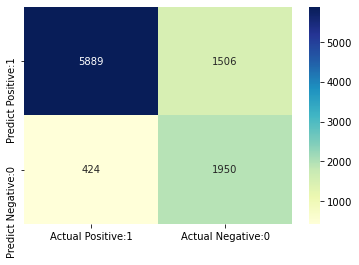

In [59]:
ConfusionCol_list = ['Actual Positive:1', 'Actual Negative:0']
ConfusionIdx_list = ['Predict Positive:1', 'Predict Negative:0']

cm_df = pd.DataFrame(data=cm, columns=ConfusionCol_list, index=ConfusionIdx_list)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
;

# 16. Classification metrices

Classification report is another way to evaluate the classification model performance.
It displays the **precision**, **recall(sensitivity)**, **f1**, and **support** scores for the model.
I have described these terms in later.

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7395
        >50K       0.56      0.82      0.67      2374

    accuracy                           0.80      9769
   macro avg       0.75      0.81      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [61]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [62]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Classification Accuracy: {0:0.4f}'.format(classification_accuracy))

Classification Accuracy: 0.8024


In [63]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
print('Classification Error: {0:0.4f}'.format(classification_error))

Classification Error: 0.1976


In [64]:
precision = TP / (TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.7963


In [66]:
recall = TP / (TP + FN)
print('Recall (=Sensitivity): {0:0.4f}'.format(recall))

Recall (=Sensitivity): 0.9328


In [67]:
specificity = TN / (TN + FP)
print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 0.5642


# 17. Calculate class probabilities

In [68]:
y_test_predicted_1to10 = gnb.predict_proba(X_test)[0:10]
y_test_predicted_1to10

array([[1.63127998e-10, 1.00000000e+00],
       [7.19806143e-01, 2.80193857e-01],
       [9.99999352e-01, 6.48031242e-07],
       [9.99999832e-01, 1.67792875e-07],
       [9.99999984e-01, 1.57968711e-08],
       [9.99996211e-01, 3.78937498e-06],
       [9.99997050e-01, 2.95021252e-06],
       [7.44806573e-01, 2.55193427e-01],
       [9.99681016e-01, 3.18983715e-04],
       [1.00000000e+00, 9.41596079e-13]])

In [70]:
y_test_predicted_1to10_df = pd.DataFrame(data=y_test_predicted_1to10, columns=['<=50K', '>50K'])
y_test_predicted_1to10_df

,<=50K,>50K
0,1.631280e-10,1.000000e+00
1,7.198061e-01,2.801939e-01
2,9.999994e-01,6.480312e-07
3,9.999998e-01,1.677929e-07
4,1.000000e+00,1.579687e-08
5,9.999962e-01,3.789375e-06
6,9.999970e-01,2.950213e-06
7,7.448066e-01,2.551934e-01
8,9.996810e-01,3.189837e-04
9,1.000000e+00,9.415961e-13


''

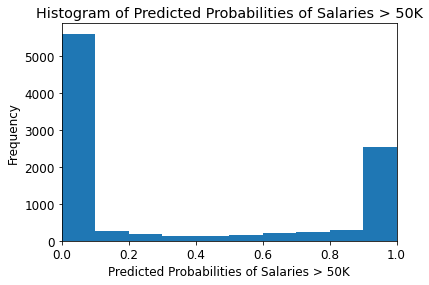

In [71]:
y_test_predicted_morethan_50K = gnb.predict_proba(X_test)[:, 1]

plt.rcParams['font.size'] = 12

plt.hist(y_test_predicted_morethan_50K, bins=10)
plt.title('Histogram of Predicted Probabilities of Salaries > 50K')
plt.xlim(0, 1)
plt.xlabel('Predicted Probabilities of Salaries > 50K')
plt.ylabel('Frequency')
;

### Observations
* We can see that the above histogram is highly positive skewed.
* The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
* There are relatively small number of observations with probability > 0.5.
* So, these small number of observations predict that the salaries will be >50K.
* Majority of observations predcit that the salaries will be <=50K.